# Assignment 4 - ML for marketing

## Juliana Sánchez Ramírez

### Exercise 3 (p.332, Chap.8)

Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of pm1. The x axis should display pm1, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy. 

Hint: In a setting with two classes, pˆm1 = 1 − pˆm2. You could make this plot by hand, but it will be much easier to make in R.

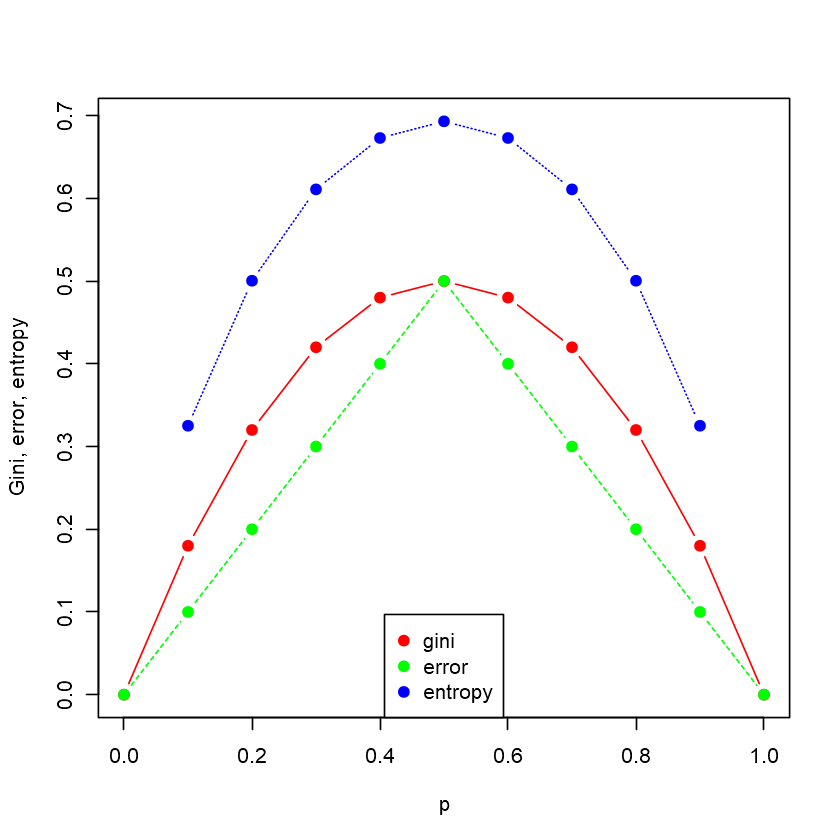

In [19]:
p <- seq(0, 1, 0.1)
gini <- 2 * p * (1 - p)
error <- 1 - pmax(p, 1 - p)
entropy <- - (p * log(p) + (1 - p) * log(1 - p))
matplot(p, cbind(gini, error, entropy), pch=c(19,19,19) ,ylab = "Gini, error, entropy",col = c("red" , "green", "blue"), type = 'b')
legend('bottom',  legend = c('gini', 'error', 'entropy'), col = c("red" , "green", "blue"), pch=c(19,19,19))

### Excercise 5 (p.332, Chap.8)

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X)

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?

### Average: 

The average probability is 0.45m in this case the final classification will be green

### Voting:

The results of the votes are: Green, Green, Green, Green, Red, Red, Red, Red, Red, Red. The majority is red so in this case the final classification will be Red

### Excercise 8 (p.333, Chap.8)

In the lab, a classification tree was applied to the Carseats data set after converting Sales into a qualitative response variable. Now we will seek to predict Sales using regression trees and related approaches, treating the response as a  quantitative variable.

(a) Split the data set into a training set and a test set.


In [29]:
library(ISLR)
library(mltools)
library(data.table)

data('Carseats')

Warning message:
"package 'data.table' was built under R version 3.6.3"

In [30]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [31]:
# Train test separate 
set.seed(123)
sample <- sample.int(n = nrow(Carseats), size = floor(.7*nrow(Carseats)), replace = F)
train <- Carseats[sample, ]
test  <- Carseats[-sample, ]


(b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?

In [36]:
library(tree)

Warning message:
"package 'tree' was built under R version 3.6.3"

In [46]:
tree_sales=tree(Sales∼.,train )
summary(tree_sales)


Regression tree:
tree(formula = Sales ~ ., data = train)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "CompPrice"   "Age"         "Advertising"
Number of terminal nodes:  19 
Residual mean deviance:  2.373 = 619.2 / 261 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-4.1570 -1.0160  0.1123  0.0000  0.8903  4.0310 

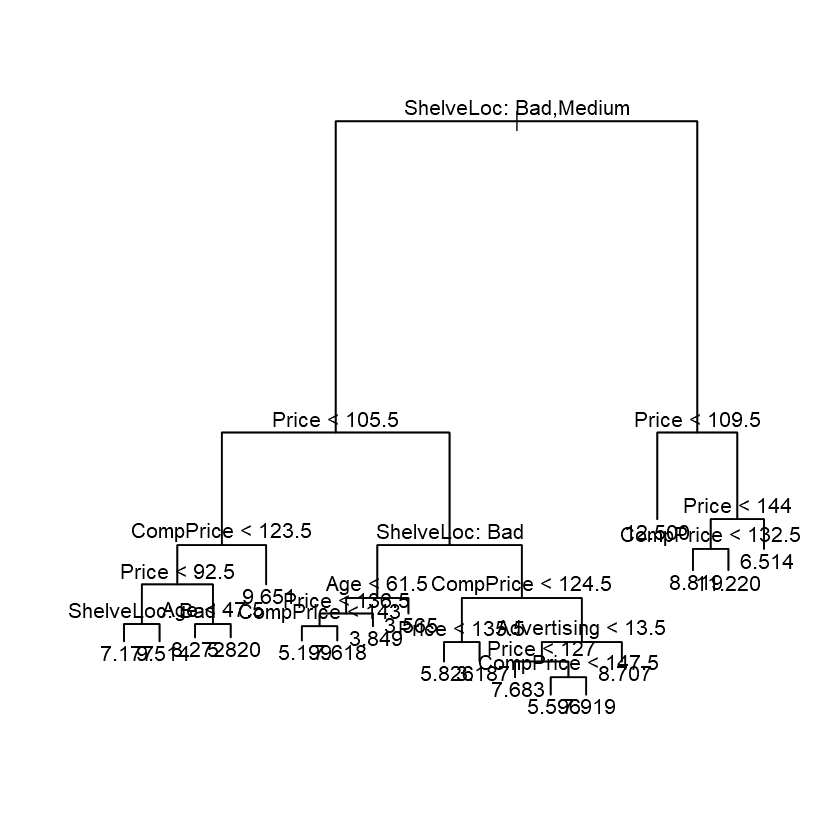

In [47]:
plot(tree_sales)
text(tree_sales , pretty =0)

In [48]:
sales_pred <- predict(tree_sales, newdata = test)
mean((sales_pred - test$Sales)^2)

[1] 3.602818

The MSE in the test set is 3.6, the variables included in the tree are ShelveLoc, Price, CompPrice, Age and Advertising


(c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?


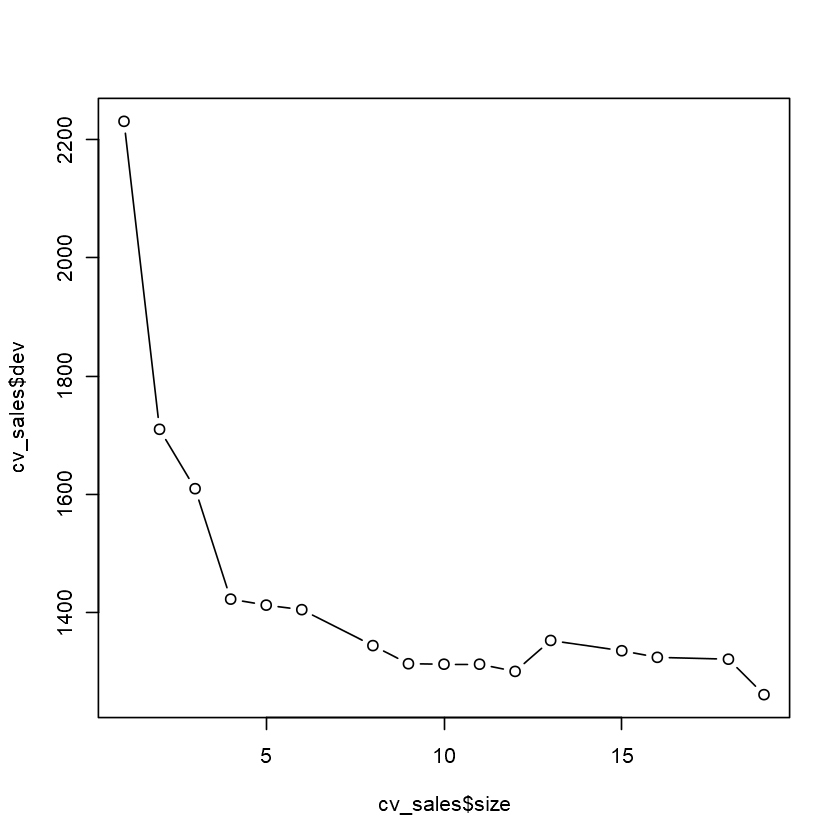

In [51]:
cv_sales=cv.tree(tree_sales)
plot(cv_sales$size ,cv_sales$dev ,type='b')

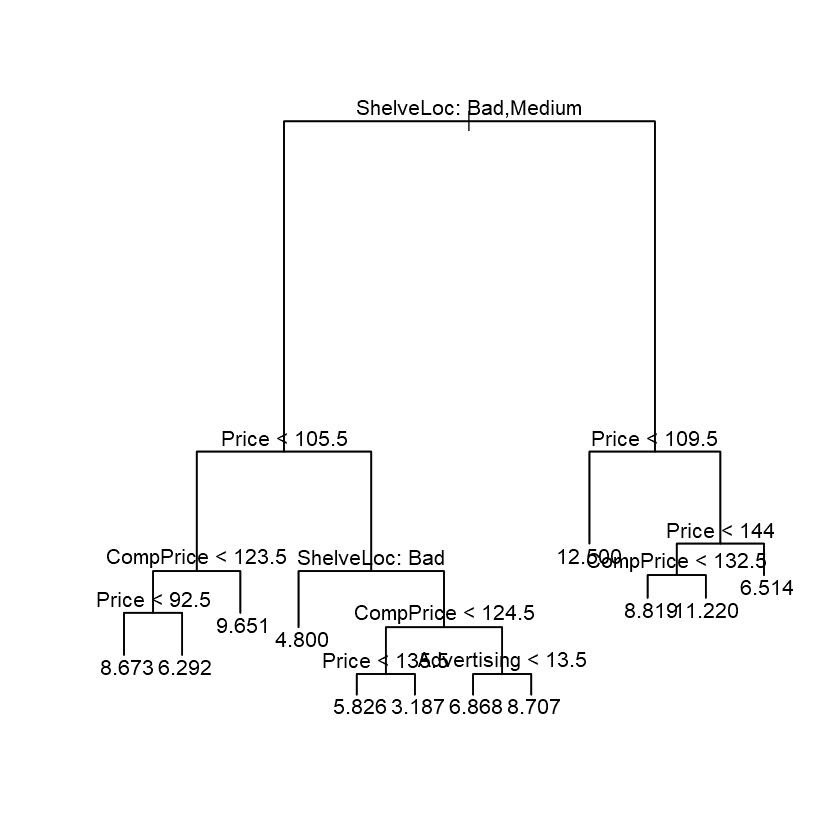

In [82]:
prune_sales=prune.tree(tree_sales ,best=12)
plot(prune_sales)
text(prune_sales , pretty =0)

In [83]:
#Calculate error with pruned tree
pred_prune <- predict(prune_sales, newdata = test)
mean((pred_prune - test$Sales)^2)

[1] 4.349117

The RMSE increases in this case using pruning

(d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the importance() function to determine which variables are most important.

In [90]:
install.packages("randomForest")


Warning message:
"package 'randomForest' is not available (for R version 3.6.1)"